In [38]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()
init_notebook_mode(connected=True)

In [39]:

import os
file_path= r'C:\\Users\\danva\\Desktop\\analysis\\renamed\\'
for folder , sub_folders, files in os.walk(file_path):
    print(f'Currently lookin at {folder}')
    print('\n')
    print('The subfolders are: ')
    for sub_fold in sub_folders:
        print(f'\t Subfolder: {sub_fold}')
    print('\n')
    print(f'The files are: {files}')
    print('\n')
    
    for f in files:
        print(f'\t File: {f}')
        if 'medi' in f:
            os.rename(folder+'\\'+f, folder+'\\'+'medii.csv')
        elif 'varst' in f:
            os.rename(folder+'\\'+f, folder+'\\'+'varsta.csv')
        elif 'rata' in f:
            os.rename(folder+'\\'+f, folder+'\\'+'rata.csv')
        elif 'educat' in f or 'studii' in f or 'ed' in f:
            os.rename(folder+'\\'+f, folder+'\\'+'educatie.csv')
        print('\n')
        print(f'\t File: {f}')
        # print(f'\t All the files are {files}')
        # print('\n')
    print('\n')
    print(f' I exit here haha ')
    print('\n')

Currently lookin at C:\\Users\\danva\\Desktop\\analysis\\renamed\\


The subfolders are: 
	 Subfolder: 18-08
	 Subfolder: 18-09
	 Subfolder: 18-10
	 Subfolder: 18-11
	 Subfolder: 18-12
	 Subfolder: 19-01
	 Subfolder: 19-02
	 Subfolder: 19-03
	 Subfolder: 19-04
	 Subfolder: 19-05
	 Subfolder: 19-06
	 Subfolder: 19-07
	 Subfolder: 19-08 nu exista
	 Subfolder: 19-09
	 Subfolder: 19-10
	 Subfolder: 19-11
	 Subfolder: 19-12
	 Subfolder: 20-01
	 Subfolder: 20-02
	 Subfolder: 20-03
	 Subfolder: 20-04
	 Subfolder: 20-05
	 Subfolder: 20-06
	 Subfolder: 20-07
	 Subfolder: 20-08
	 Subfolder: 20-09
	 Subfolder: 20-10
	 Subfolder: 20-11
	 Subfolder: 20-12
	 Subfolder: 21-01
	 Subfolder: 21-02
	 Subfolder: 21-03
	 Subfolder: 21-04
	 Subfolder: 21-05
	 Subfolder: 21-06
	 Subfolder: 21-07
	 Subfolder: 21-08
	 Subfolder: 21-09
	 Subfolder: 21-10
	 Subfolder: 21-11
	 Subfolder: 21-12
	 Subfolder: 22-01
	 Subfolder: 22-02
	 Subfolder: 22-03
	 Subfolder: 22-04
	 Subfolder: 22-05
	 Subfolder: 22-06
	 Subfo

In [40]:
import os
import pandas as pd
folder_path= r'C:\\Users\\danva\\Desktop\\analysis\\renamed\\'
base = pd.DataFrame()
for folder , sub_folders, files in os.walk(folder_path):
    print(f'Currently lookin at {folder}')
    print('\n')
    print('The subfolders are: ')
    for sub_fold in sub_folders:
        print(f'\t Subfolder: {sub_fold}')

    print('\n')
    print('The files are: ')
    
    csv_files = [f for f in files if f.endswith('.csv')]
    df_list = []
    for csv in csv_files:
        file_path = os.path.join(folder, csv)
        df = pd.read_csv(file_path, encoding='ISO-8859-1')
        
        df=df[:42]
                
        df.rename(columns=lambda x: x.replace(" ", "").replace('.','').replace('?','').replace("-", "").replace("Ă", "A").replace("Ţ", "T").replace("Ă", "A").replace("Ş", "S").replace("Â", "a").replace("Î", "I").replace(',','').lower(), inplace=True)

        for item in df.columns:
            if 'unnamed' in item:
                df.drop(item, axis=1,inplace=True)
                
        year_month = folder.split('\\')[-1]
        df['origin'] = year_month + '-' + csv[:-4]
        
        df[df.columns[0]]=df[df.columns[0]].apply(lambda s: s.lower().replace('mun.','').replace('.','').replace('municipiul','').replace('-severin','').replace(' ','').replace('uresti','').replace("ă", "a").replace("ț", "t").replace("ă", "a").replace("ș", "s").replace("â", "a").replace("î", "i").replace('-','').replace('nasaud','').replace('severin',''))
        print('\n')
        print(f"Before sorting:")
        print(df[df.columns[0]])
        df=df.sort_values(by=df.columns[0], ascending=True )
        df = df.reset_index(drop=True)
        print('\n')
        print(f"After sorting:")
        print(df[df.columns[0]])
        print('\n')
        print(df.columns)
        print('\n')
        print(len(df.columns))
        print('\n')
        df_list.append(df)
    if df_list:
        current_month = pd.concat(df_list, axis=1, ignore_index=True)
        current_month = current_month.iloc[:42, :]  
        print(len(current_month.columns))
        print('\n')
        if not current_month.empty:
            # Append the current_month DataFrame to the list for vertical concatenation
            base = pd.concat([base, current_month], axis=0, ignore_index=True)
    
    print('\n')
    print(f'\t All the files are {files}')
    print('\n')
    print('\n')
    print(f' I exit here haha ')
    print('\n')
base

Currently lookin at C:\\Users\\danva\\Desktop\\analysis\\renamed\\


The subfolders are: 
	 Subfolder: 18-08
	 Subfolder: 18-09
	 Subfolder: 18-10
	 Subfolder: 18-11
	 Subfolder: 18-12
	 Subfolder: 19-01
	 Subfolder: 19-02
	 Subfolder: 19-03
	 Subfolder: 19-04
	 Subfolder: 19-05
	 Subfolder: 19-06
	 Subfolder: 19-07
	 Subfolder: 19-08 nu exista
	 Subfolder: 19-09
	 Subfolder: 19-10
	 Subfolder: 19-11
	 Subfolder: 19-12
	 Subfolder: 20-01
	 Subfolder: 20-02
	 Subfolder: 20-03
	 Subfolder: 20-04
	 Subfolder: 20-05
	 Subfolder: 20-06
	 Subfolder: 20-07
	 Subfolder: 20-08
	 Subfolder: 20-09
	 Subfolder: 20-10
	 Subfolder: 20-11
	 Subfolder: 20-12
	 Subfolder: 21-01
	 Subfolder: 21-02
	 Subfolder: 21-03
	 Subfolder: 21-04
	 Subfolder: 21-05
	 Subfolder: 21-06
	 Subfolder: 21-07
	 Subfolder: 21-08
	 Subfolder: 21-09
	 Subfolder: 21-10
	 Subfolder: 21-11
	 Subfolder: 21-12
	 Subfolder: 22-01
	 Subfolder: 22-02
	 Subfolder: 22-03
	 Subfolder: 22-04
	 Subfolder: 22-05
	 Subfolder: 22-06
	 Subfo



Before sorting:
0          alba
1          arad
2         arges
3         bacau
4         bihor
5      bistrita
6      botosani
7        braila
8        brasov
9         buzau
10     calarasi
11        caras
12         cluj
13    constanta
14      covasna
15    dambovita
16         dolj
17       galati
18      giurgiu
19         gorj
20     harghita
21    hunedoara
22     ialomita
23         iasi
24        ilfov
25    maramures
26    mehedinti
27        mures
28        neamt
29          olt
30      prahova
31        salaj
32     satumare
33        sibiu
34      suceava
35    teleorman
36        timis
37       tulcea
38       valcea
39       vaslui
40      vrancea
41          buc
Name: judet, dtype: object


After sorting:
0          alba
1          arad
2         arges
3         bacau
4         bihor
5      bistrita
6      botosani
7        braila
8        brasov
9           buc
10        buzau
11     calarasi
12        caras
13         cluj
14    constanta
15      covasna
16    damb

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,alba,5690,704,775,1670,1283,44,946.0,268,18-08-educatie,...,18-08-rata,alba,5690,689,331,1125,1579,922,1044,18-08-varsta
1,arad,2859,0,1102,896,434,25,208.0,194,18-08-educatie,...,18-08-rata,arad,2859,286,123,413,760,503,774,18-08-varsta
2,arges,8822,893,2240,2891,1204,74,1166.0,354,18-08-educatie,...,18-08-rata,arges,8822,1014,538,1753,2464,1521,1532,18-08-varsta
3,bacau,12947,1984,2878,2450,2162,126,2933.0,414,18-08-educatie,...,18-08-rata,bacau,12947,1785,1981,2249,2363,2340,2229,18-08-varsta
4,bihor,4144,716,823,818,861,84,419.0,423,18-08-educatie,...,18-08-rata,bihor,4144,714,261,863,1095,669,542,18-08-varsta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2557,timis,2755,276,273,639,749,40,370.0,408,23-09-educatie,...,23-09-rata,timis,2755,456,132,483,638,415,631,23-09-varsta
2558,tulcea,2689,0,252,1197,676,0,425.0,139,23-09-educatie,...,23-09-rata,tulcea,2689,707,294,329,433,479,447,23-09-varsta
2559,valcea,4551,156,553,1270,1431,49,883.0,209,23-09-educatie,...,23-09-rata,valcea,4551,1027,282,523,904,956,859,23-09-varsta
2560,vaslui,8083,363,1857,3731,904,26,1136.0,66,23-09-educatie,...,23-09-rata,vaslui,8083,405,186,1020,2363,2080,2029,23-09-varsta


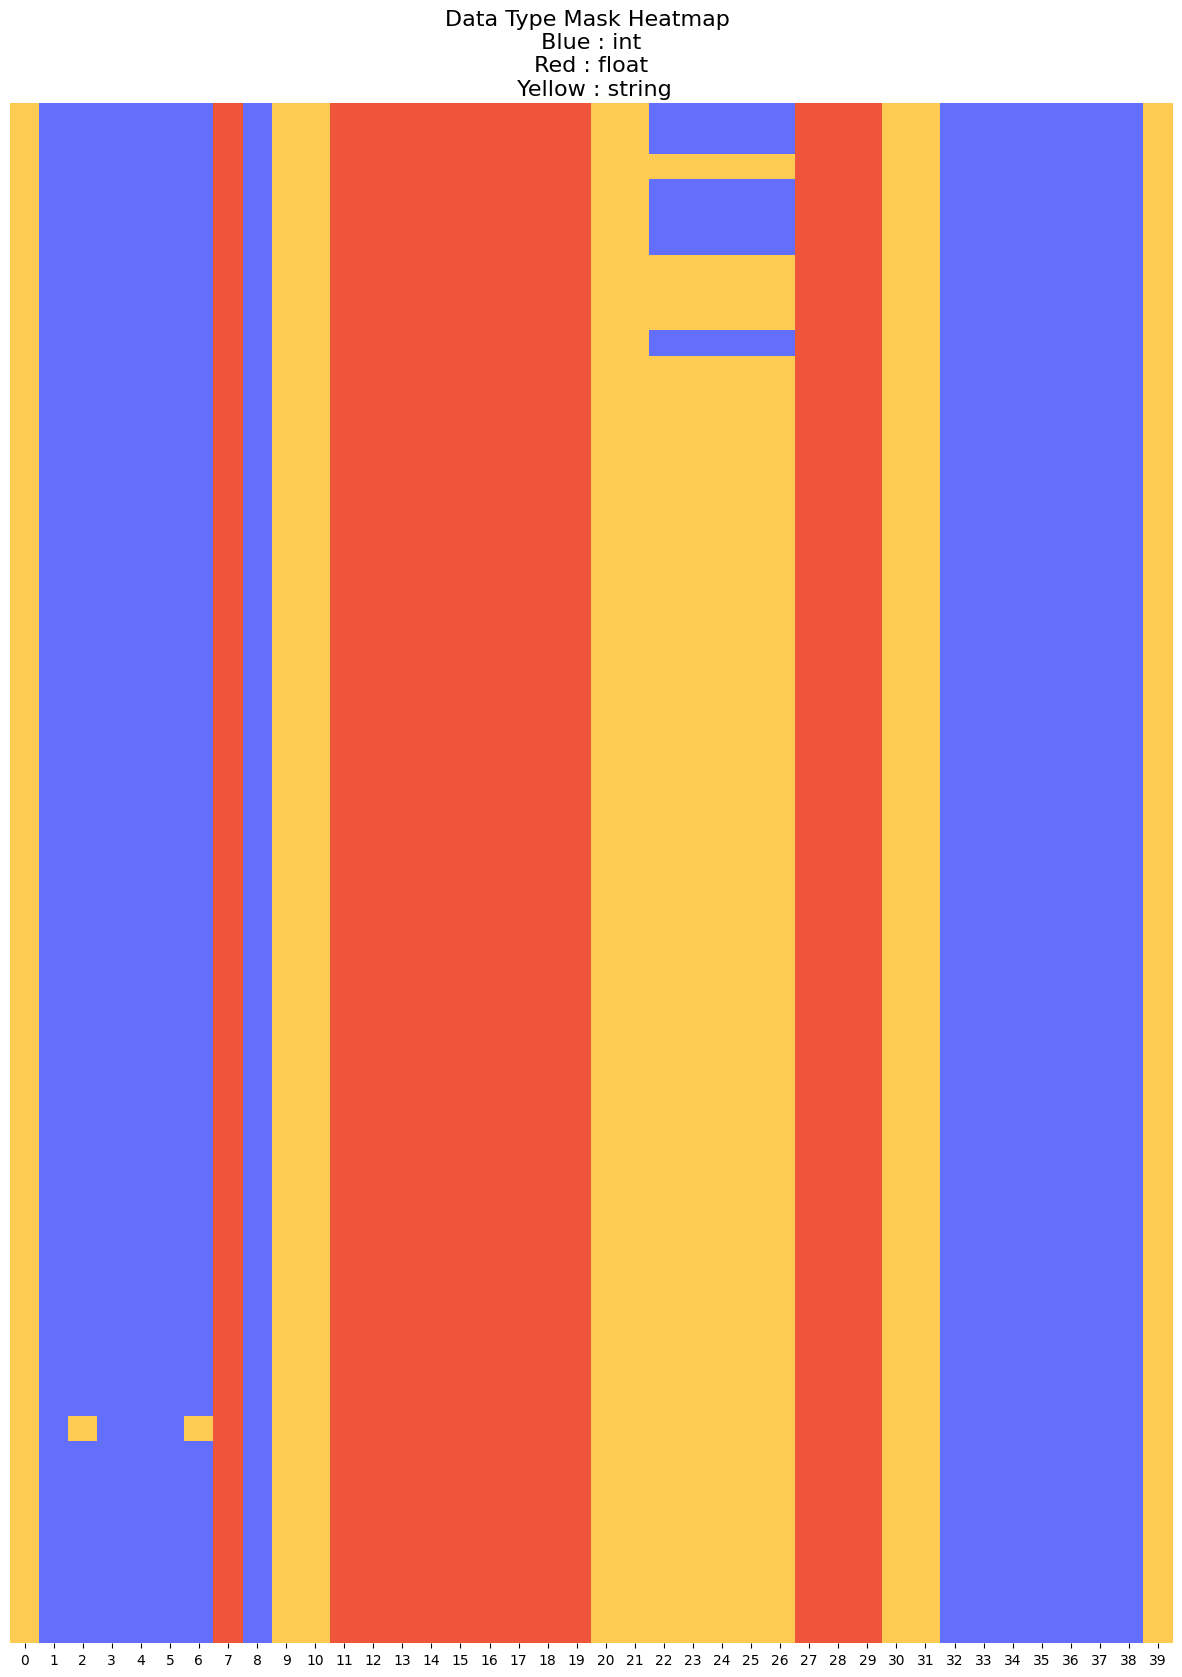

In [41]:
mask = base.applymap(lambda x: 2 if isinstance(x, (float, np.floating))
                  else 1 if isinstance(x, (int, np.integer))
                  else 3)
# 1 for in , 3 for object , 2 for floating

plt.figure(figsize = (15,20))
heatmap = sns.heatmap(mask, yticklabels=False, cbar=False, cmap=['#636EFA', '#EF553B', '#FECB52'])
heatmap.set_title("Data Type Mask Heatmap \n Blue : int \n Red : float \n Yellow : string", fontsize=16)
plt.show()

<Axes: >

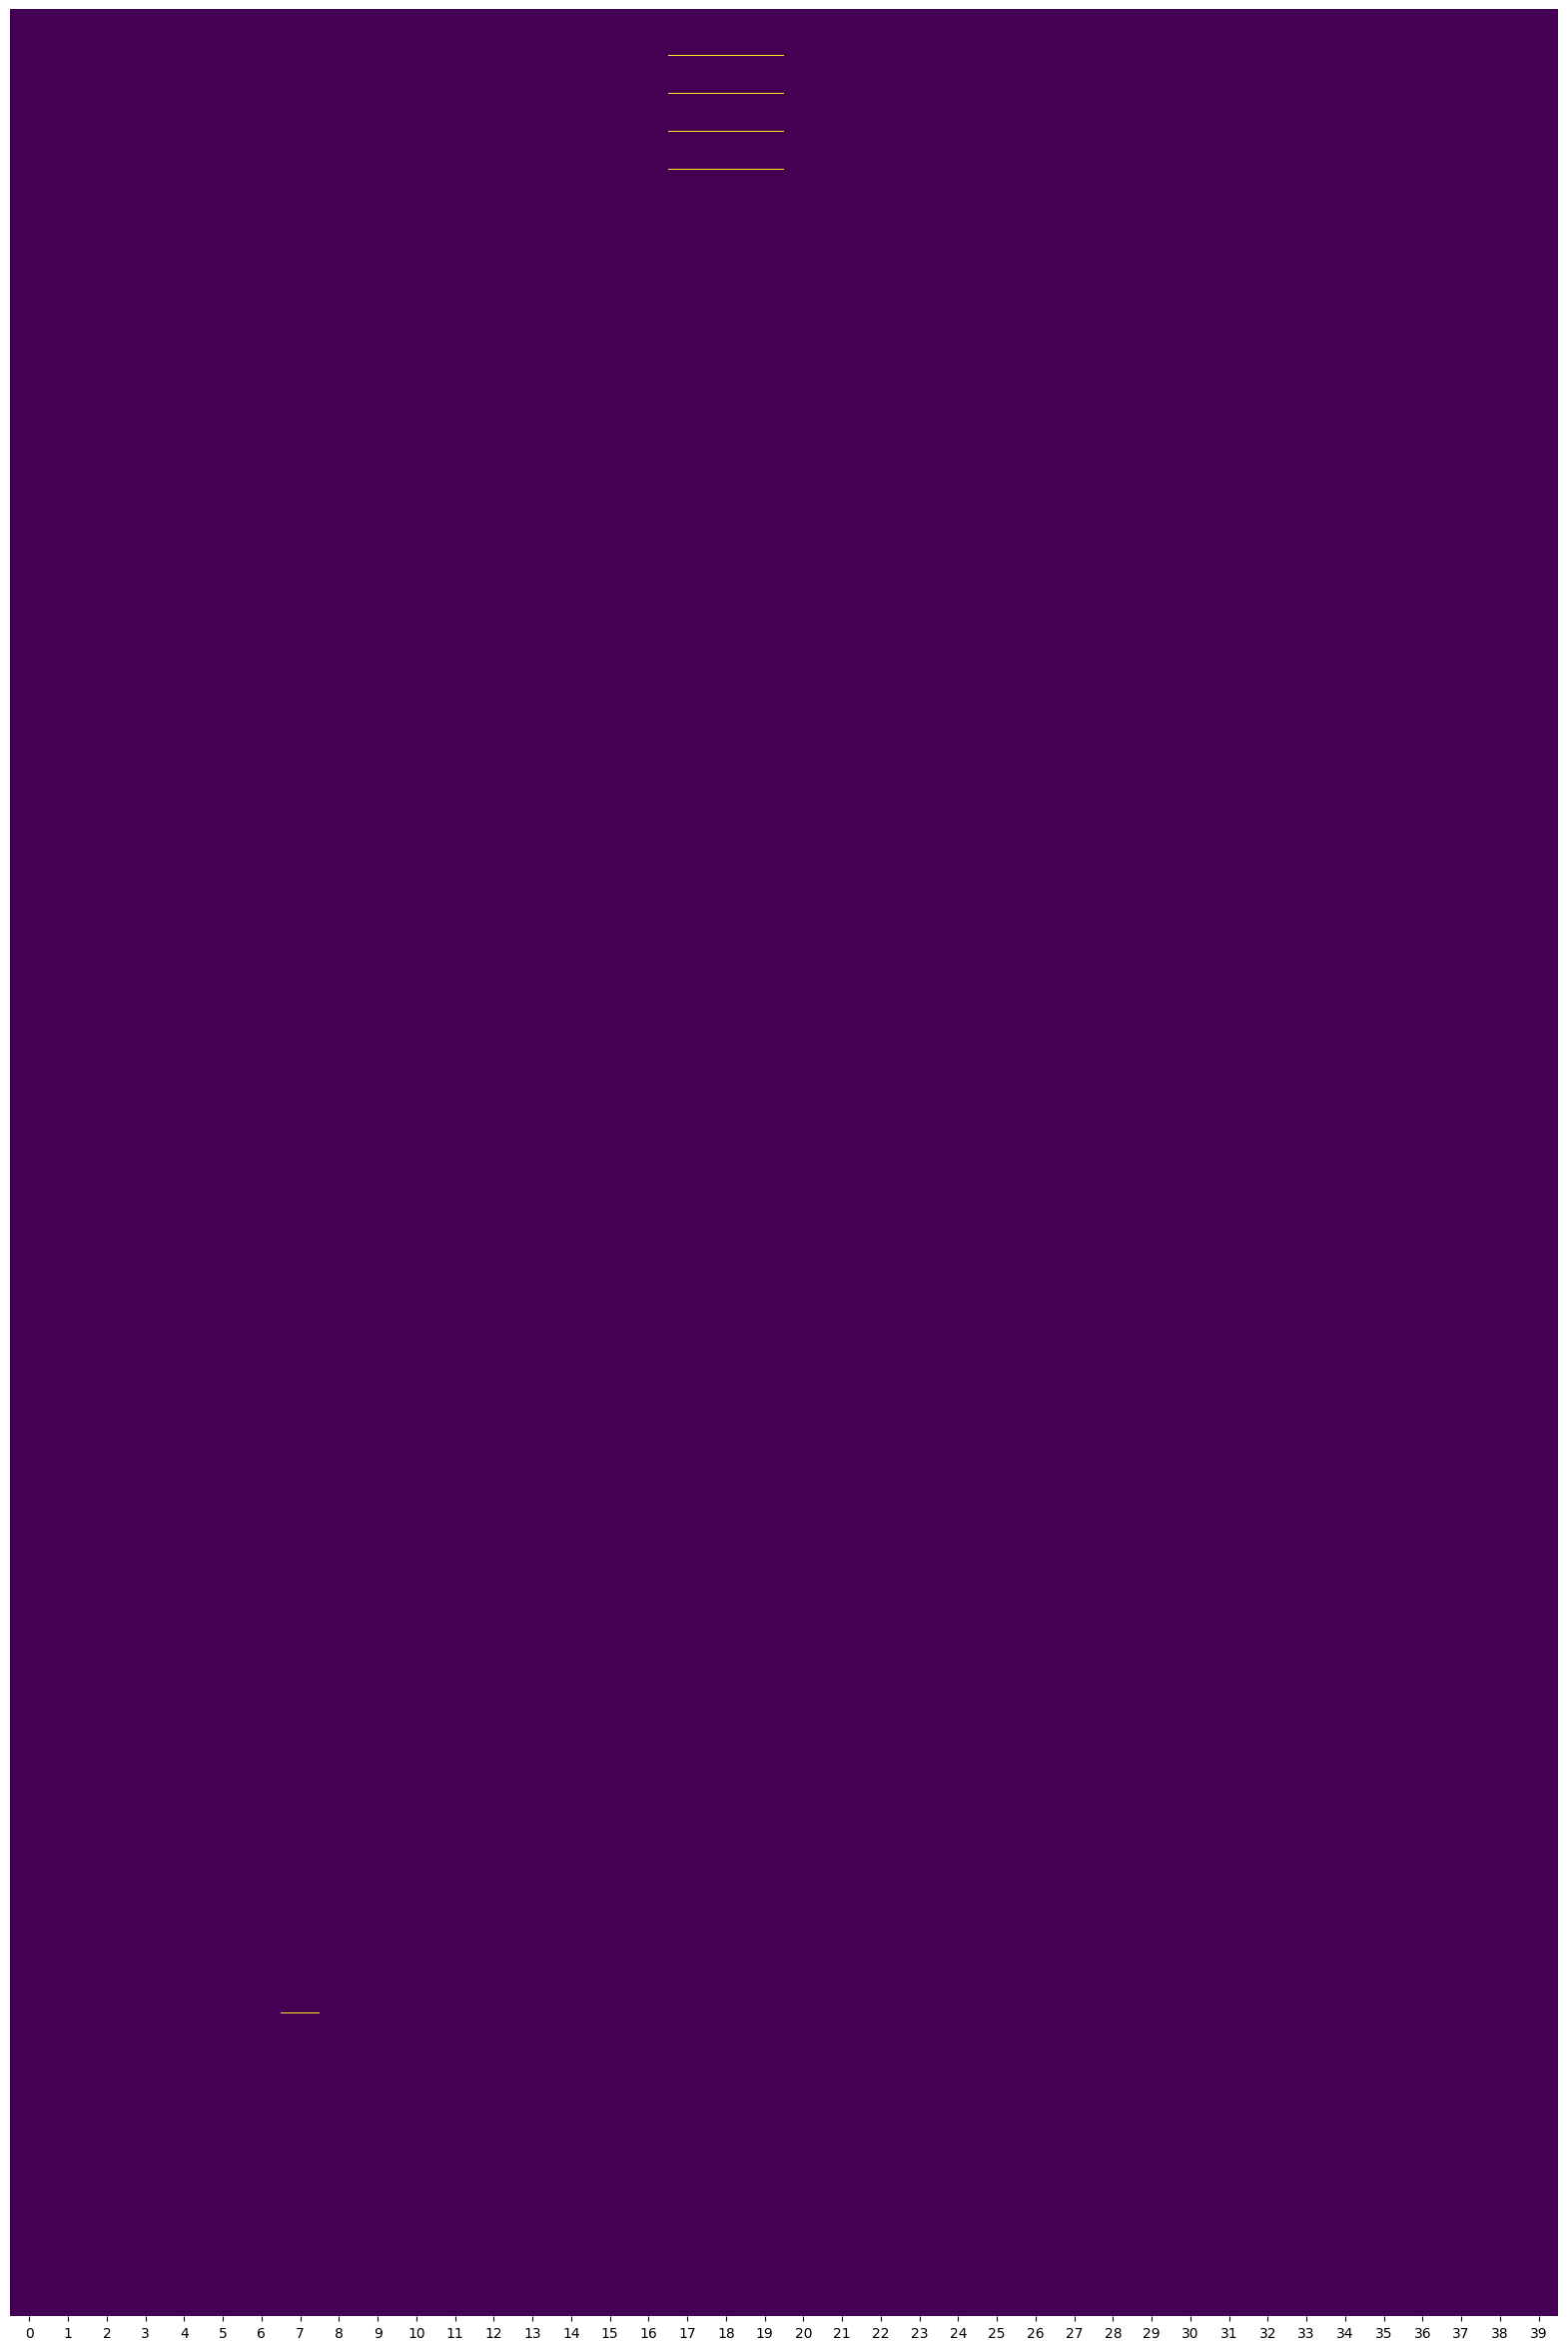

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,30))
sns.heatmap(base.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [43]:
dict_column_name = {}
keys = range(40)
column_names = ['judet', 'totalsomeridincare:', 'farastudii', 'invatamantprimar',
       'invatamantgimnazial', 'invatamantliceal', 'invatamantposticeal',
       'invatamantprofesional/artesimeserii', 'invatamantuniversitar','origin' ,
       'judet', 'numartotalsomeri', 'numartotalsomerifemei',
       'numartotalsomeribarbati', 'numartotalsomeridinmediulurban',
       'numarsomerifemeidinmediulurban', 'numarsomeribarbatidinmediulurban',
       'numartotalsomeridinmediulrural', 'numarsomerifemeidinmediulrural',
       'numarsomeribarbatidinmediulrural','origin',
       'judet', 'numartotalsomeri', 'numartotalsomerifemei',
       'numartotalsomeribarbati', 'numarsomeriindemnizati',
       'numarsomerineindemnizati', 'ratasomajului(%)',
       'ratasomajuluifeminina(%)', 'ratasomajuluimasculina(%)','origin',
       'judet', 'total', 'sub25ani', '2529ani', '3039ani', '4049ani',
       '5055ani', 'peste55ani','origin']
for i in keys:
    dict_column_name[i] = column_names[i]
print(dict_column_name)

{0: 'judet', 1: 'totalsomeridincare:', 2: 'farastudii', 3: 'invatamantprimar', 4: 'invatamantgimnazial', 5: 'invatamantliceal', 6: 'invatamantposticeal', 7: 'invatamantprofesional/artesimeserii', 8: 'invatamantuniversitar', 9: 'origin', 10: 'judet', 11: 'numartotalsomeri', 12: 'numartotalsomerifemei', 13: 'numartotalsomeribarbati', 14: 'numartotalsomeridinmediulurban', 15: 'numarsomerifemeidinmediulurban', 16: 'numarsomeribarbatidinmediulurban', 17: 'numartotalsomeridinmediulrural', 18: 'numarsomerifemeidinmediulrural', 19: 'numarsomeribarbatidinmediulrural', 20: 'origin', 21: 'judet', 22: 'numartotalsomeri', 23: 'numartotalsomerifemei', 24: 'numartotalsomeribarbati', 25: 'numarsomeriindemnizati', 26: 'numarsomerineindemnizati', 27: 'ratasomajului(%)', 28: 'ratasomajuluifeminina(%)', 29: 'ratasomajuluimasculina(%)', 30: 'origin', 31: 'judet', 32: 'total', 33: 'sub25ani', 34: '2529ani', 35: '3039ani', 36: '4049ani', 37: '5055ani', 38: 'peste55ani', 39: 'origin'}


In [44]:
base.rename(columns=dict_column_name,
          inplace=True)

In [45]:
base.columns

Index(['judet', 'totalsomeridincare:', 'farastudii', 'invatamantprimar',
       'invatamantgimnazial', 'invatamantliceal', 'invatamantposticeal',
       'invatamantprofesional/artesimeserii', 'invatamantuniversitar',
       'origin', 'judet', 'numartotalsomeri', 'numartotalsomerifemei',
       'numartotalsomeribarbati', 'numartotalsomeridinmediulurban',
       'numarsomerifemeidinmediulurban', 'numarsomeribarbatidinmediulurban',
       'numartotalsomeridinmediulrural', 'numarsomerifemeidinmediulrural',
       'numarsomeribarbatidinmediulrural', 'origin', 'judet',
       'numartotalsomeri', 'numartotalsomerifemei', 'numartotalsomeribarbati',
       'numarsomeriindemnizati', 'numarsomerineindemnizati',
       'ratasomajului(%)', 'ratasomajuluifeminina(%)',
       'ratasomajuluimasculina(%)', 'origin', 'judet', 'total', 'sub25ani',
       '2529ani', '3039ani', '4049ani', '5055ani', 'peste55ani', 'origin'],
      dtype='object')

In [46]:
base.columns=pd.io.parsers.base_parser.ParserBase({'names':df.columns, 'usecols':None})._maybe_dedup_names(base.columns)

In [47]:
base.columns

Index(['judet', 'totalsomeridincare:', 'farastudii', 'invatamantprimar',
       'invatamantgimnazial', 'invatamantliceal', 'invatamantposticeal',
       'invatamantprofesional/artesimeserii', 'invatamantuniversitar',
       'origin', 'judet.1', 'numartotalsomeri', 'numartotalsomerifemei',
       'numartotalsomeribarbati', 'numartotalsomeridinmediulurban',
       'numarsomerifemeidinmediulurban', 'numarsomeribarbatidinmediulurban',
       'numartotalsomeridinmediulrural', 'numarsomerifemeidinmediulrural',
       'numarsomeribarbatidinmediulrural', 'origin.1', 'judet.2',
       'numartotalsomeri.1', 'numartotalsomerifemei.1',
       'numartotalsomeribarbati.1', 'numarsomeriindemnizati',
       'numarsomerineindemnizati', 'ratasomajului(%)',
       'ratasomajuluifeminina(%)', 'ratasomajuluimasculina(%)', 'origin.2',
       'judet.3', 'total', 'sub25ani', '2529ani', '3039ani', '4049ani',
       '5055ani', 'peste55ani', 'origin.3'],
      dtype='object')

<Axes: >

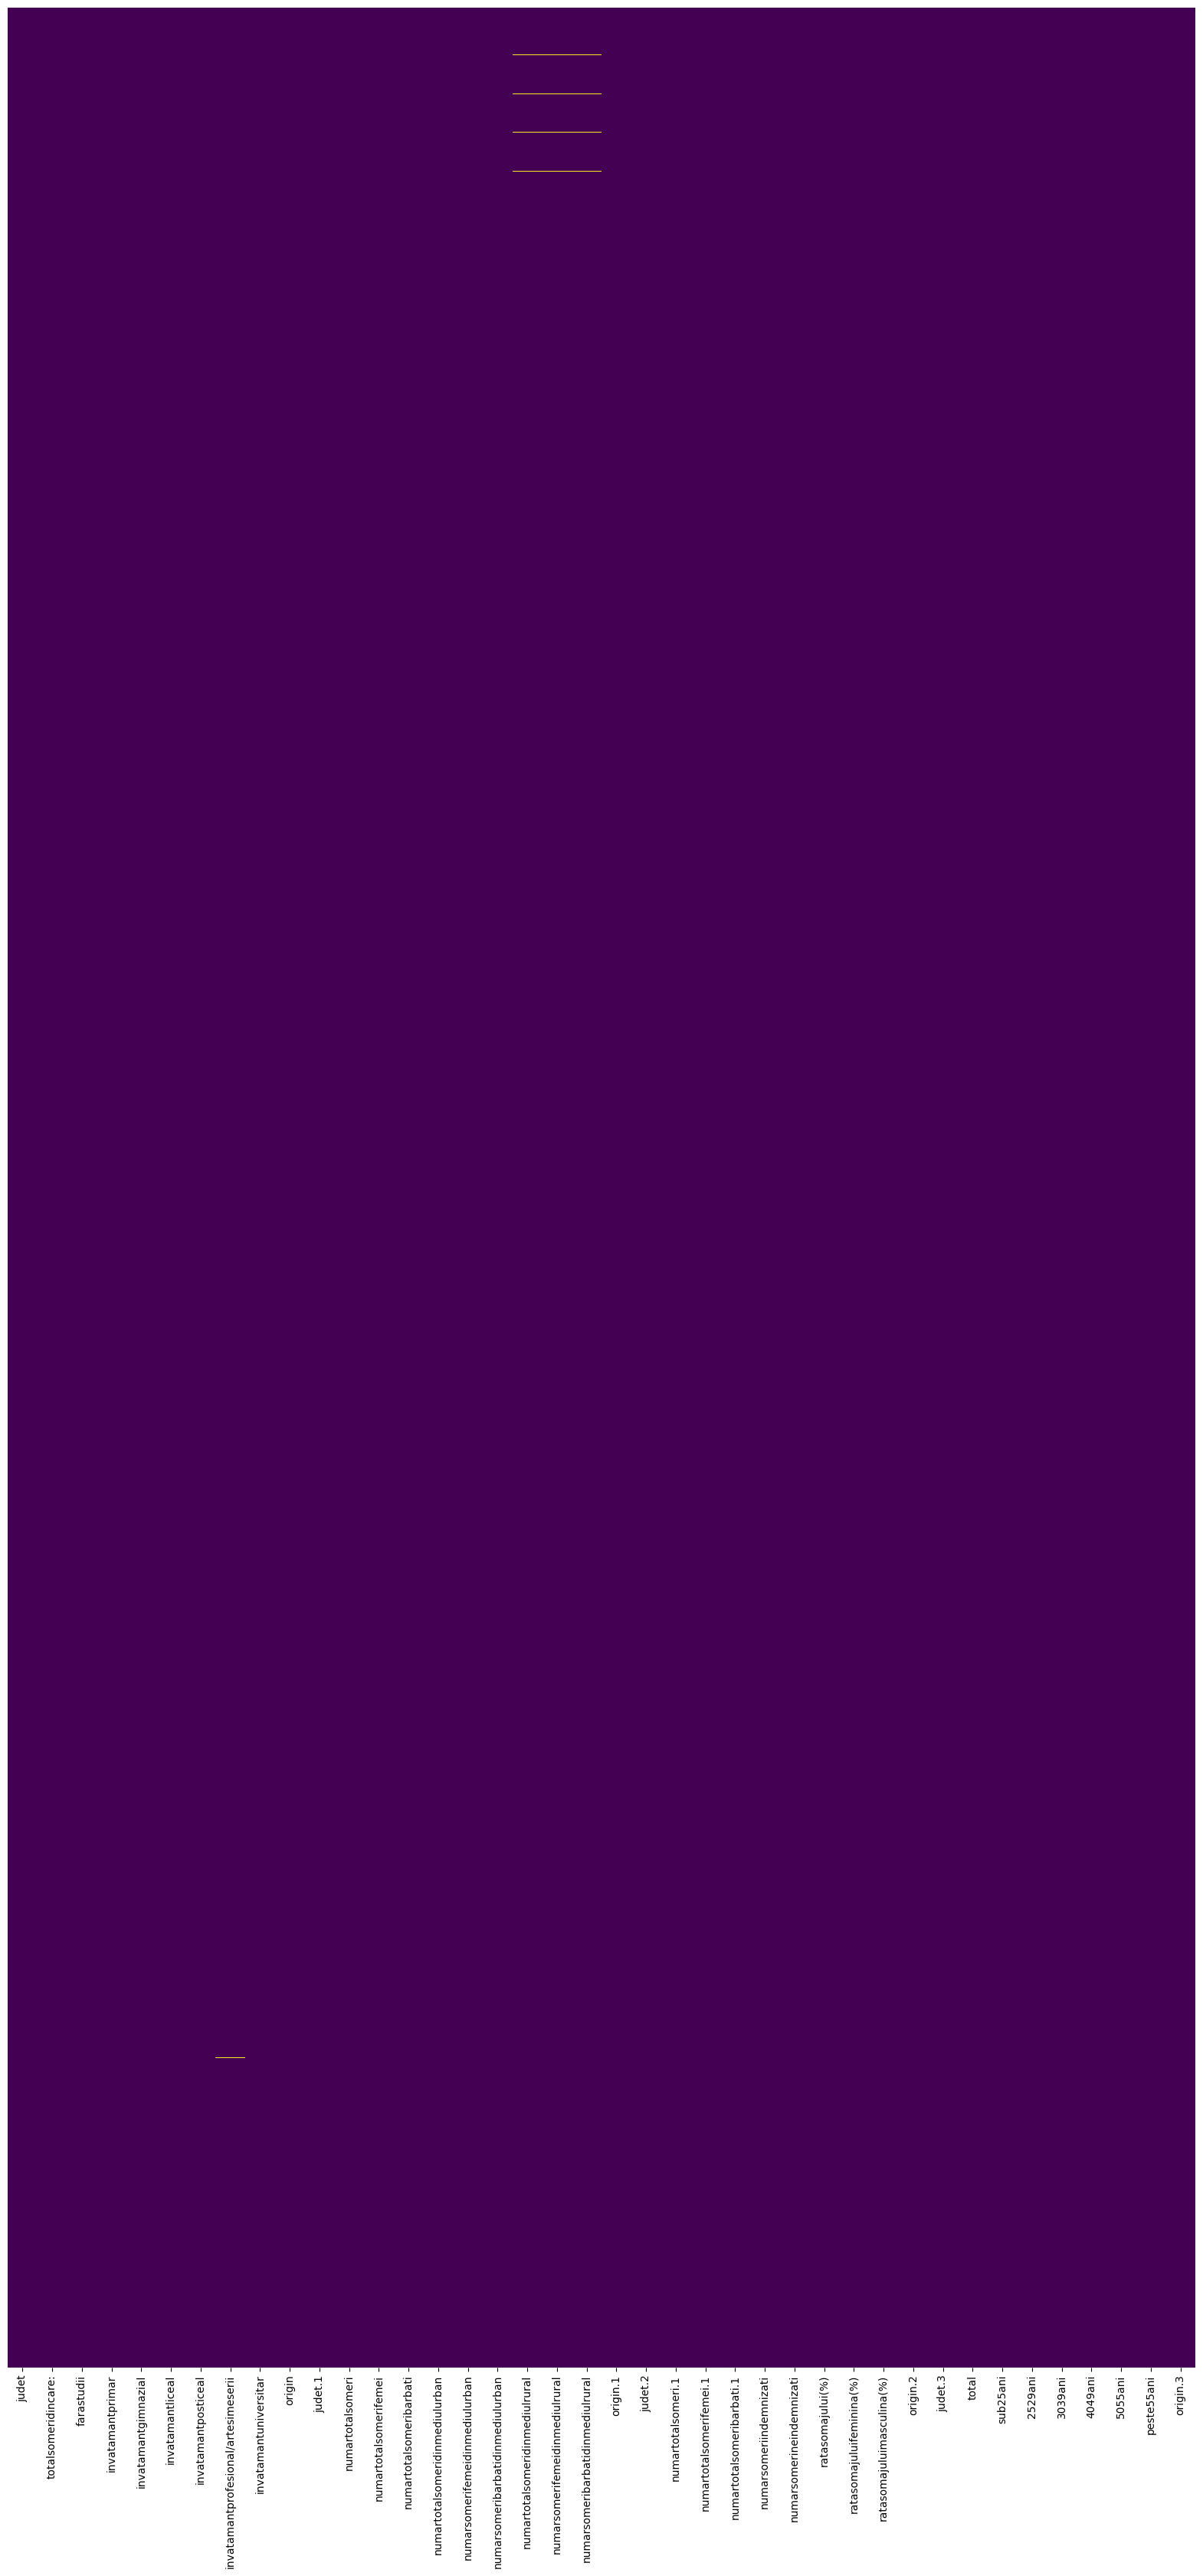

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,40))
sns.heatmap(base.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [49]:
base[base['numarsomerifemeidinmediulrural'].isnull()]['origin']

51     18-09-educatie
93     18-10-educatie
135    18-11-educatie
177    18-12-educatie
Name: origin, dtype: object

In [50]:
base[['origin','numarsomerifemeidinmediulrural']][49:53]

,origin,numarsomerifemeidinmediulrural
49,18-09-educatie,1497.0
50,18-09-educatie,1812.0
51,18-09-educatie,NaN
52,18-09-educatie,3910.0


In [51]:
base[base['judet']!=base['judet.3']][['judet','judet.1','judet.2','judet.3']]

,judet,judet.1,judet.2,judet.3
75,satum,satumare,satum,satumare
117,satum,satumare,satum,satumare
159,satum,satumare,satum,satumare
201,satum,satumare,satum,satumare
243,satum,satumare,satum,satumare
285,satum,satumare,satum,satumare
327,satum,satumare,satum,satumare
369,satum,satumare,satum,satumare
411,satum,satumare,satumare,satumare
453,satum,satumare,satumare,satumare


In [52]:
base[(base['judet'] != base['judet.3']) & (base['judet'] != 'satum')]

,judet,totalsomeridincare:,farastudii,invatamantprimar,invatamantgimnazial,invatamantliceal,invatamantposticeal,invatamantprofesional/artesimeserii,invatamantuniversitar,origin,...,origin.2,judet.3,total,sub25ani,2529ani,3039ani,4049ani,5055ani,peste55ani,origin.3
2196,cara?,3705,469,1448,1152,568,36,426.0,75,23-01-educatie,...,23-01-rata,caras,2437,271,136,360,599,560,511,23-01-varsta
2277,bucure?ti,12369,23,66,2216,4601,416,2128.0,2919,23-03-educatie,...,23-03-rata,buc,12369,175,897,2632,3521,3041,2103,23-03-varsta


In [53]:
df3=base[base['judet']!=base['judet.3']][['judet','judet.1','judet.2','judet.3']]

In [54]:
df3[df3['judet']!='satum']

,judet,judet.1,judet.2,judet.3
2196,cara?,caras,cara?,caras
2277,bucure?ti,buc,buc,buc


In [55]:
base[405:422][['judet','judet.1','judet.2','origin.2','judet.3']]

,judet,judet.1,judet.2,origin.2,judet.3
405,mehedinti,mehedinti,mehedinti,19-05-rata,mehedinti
406,mures,mures,mures,19-05-rata,mures
407,neamt,neamt,neamt,19-05-rata,neamt
408,olt,olt,olt,19-05-rata,olt
409,prahova,prahova,prahova,19-05-rata,prahova
410,salaj,salaj,salaj,19-05-rata,salaj
411,satum,satumare,satumare,19-05-rata,satumare
412,sibiu,sibiu,sibiu,19-05-rata,sibiu
413,suceava,suceava,suceava,19-05-rata,suceava
414,teleorman,teleorman,teleorman,19-05-rata,teleorman


In [56]:
base[210:230][['judet.1','numarsomeribarbatidinmediulurban',
       'numartotalsomeridinmediulrural', 'numarsomerifemeidinmediulrural',
       'numarsomeribarbatidinmediulrural', 'origin.1']]

,judet.1,numarsomeribarbatidinmediulurban,numartotalsomeridinmediulrural,numarsomerifemeidinmediulrural,numarsomeribarbatidinmediulrural,origin.1
210,alba,999.0,3483.0,1418.0,2065.0,19-01-medii
211,arad,487.0,1978.0,948.0,1030.0,19-01-medii
212,arges,602.0,7165.0,3057.0,4108.0,19-01-medii
213,bacau,1490.0,9702.0,3695.0,6007.0,19-01-medii
214,bihor,452.0,2512.0,1223.0,1289.0,19-01-medii
215,bistrita,506.0,2754.0,1257.0,1497.0,19-01-medii
216,botosani,813.0,2967.0,1126.0,1841.0,19-01-medii
217,braila,709.0,3877.0,1452.0,2425.0,19-01-medii
218,brasov,782.0,4279.0,1825.0,2454.0,19-01-medii
219,buc,7333.0,0.0,0.0,0.0,19-01-medii


In [57]:
base[base['numarsomerifemeidinmediulrural'].isnull()]['numarsomerifemeidinmediulrural']

51    NaN
93    NaN
135   NaN
177   NaN
Name: numarsomerifemeidinmediulrural, dtype: float64

In [58]:
base = base.fillna(0)

In [59]:
base[base['numarsomerifemeidinmediulrural'].isnull()]['numarsomerifemeidinmediulrural']

Series([], Name: numarsomerifemeidinmediulrural, dtype: float64)

In [60]:
base

,judet,totalsomeridincare:,farastudii,invatamantprimar,invatamantgimnazial,invatamantliceal,invatamantposticeal,invatamantprofesional/artesimeserii,invatamantuniversitar,origin,...,origin.2,judet.3,total,sub25ani,2529ani,3039ani,4049ani,5055ani,peste55ani,origin.3
0,alba,5690,704,775,1670,1283,44,946.0,268,18-08-educatie,...,18-08-rata,alba,5690,689,331,1125,1579,922,1044,18-08-varsta
1,arad,2859,0,1102,896,434,25,208.0,194,18-08-educatie,...,18-08-rata,arad,2859,286,123,413,760,503,774,18-08-varsta
2,arges,8822,893,2240,2891,1204,74,1166.0,354,18-08-educatie,...,18-08-rata,arges,8822,1014,538,1753,2464,1521,1532,18-08-varsta
3,bacau,12947,1984,2878,2450,2162,126,2933.0,414,18-08-educatie,...,18-08-rata,bacau,12947,1785,1981,2249,2363,2340,2229,18-08-varsta
4,bihor,4144,716,823,818,861,84,419.0,423,18-08-educatie,...,18-08-rata,bihor,4144,714,261,863,1095,669,542,18-08-varsta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2557,timis,2755,276,273,639,749,40,370.0,408,23-09-educatie,...,23-09-rata,timis,2755,456,132,483,638,415,631,23-09-varsta
2558,tulcea,2689,0,252,1197,676,0,425.0,139,23-09-educatie,...,23-09-rata,tulcea,2689,707,294,329,433,479,447,23-09-varsta
2559,valcea,4551,156,553,1270,1431,49,883.0,209,23-09-educatie,...,23-09-rata,valcea,4551,1027,282,523,904,956,859,23-09-varsta
2560,vaslui,8083,363,1857,3731,904,26,1136.0,66,23-09-educatie,...,23-09-rata,vaslui,8083,405,186,1020,2363,2080,2029,23-09-varsta


<Axes: >

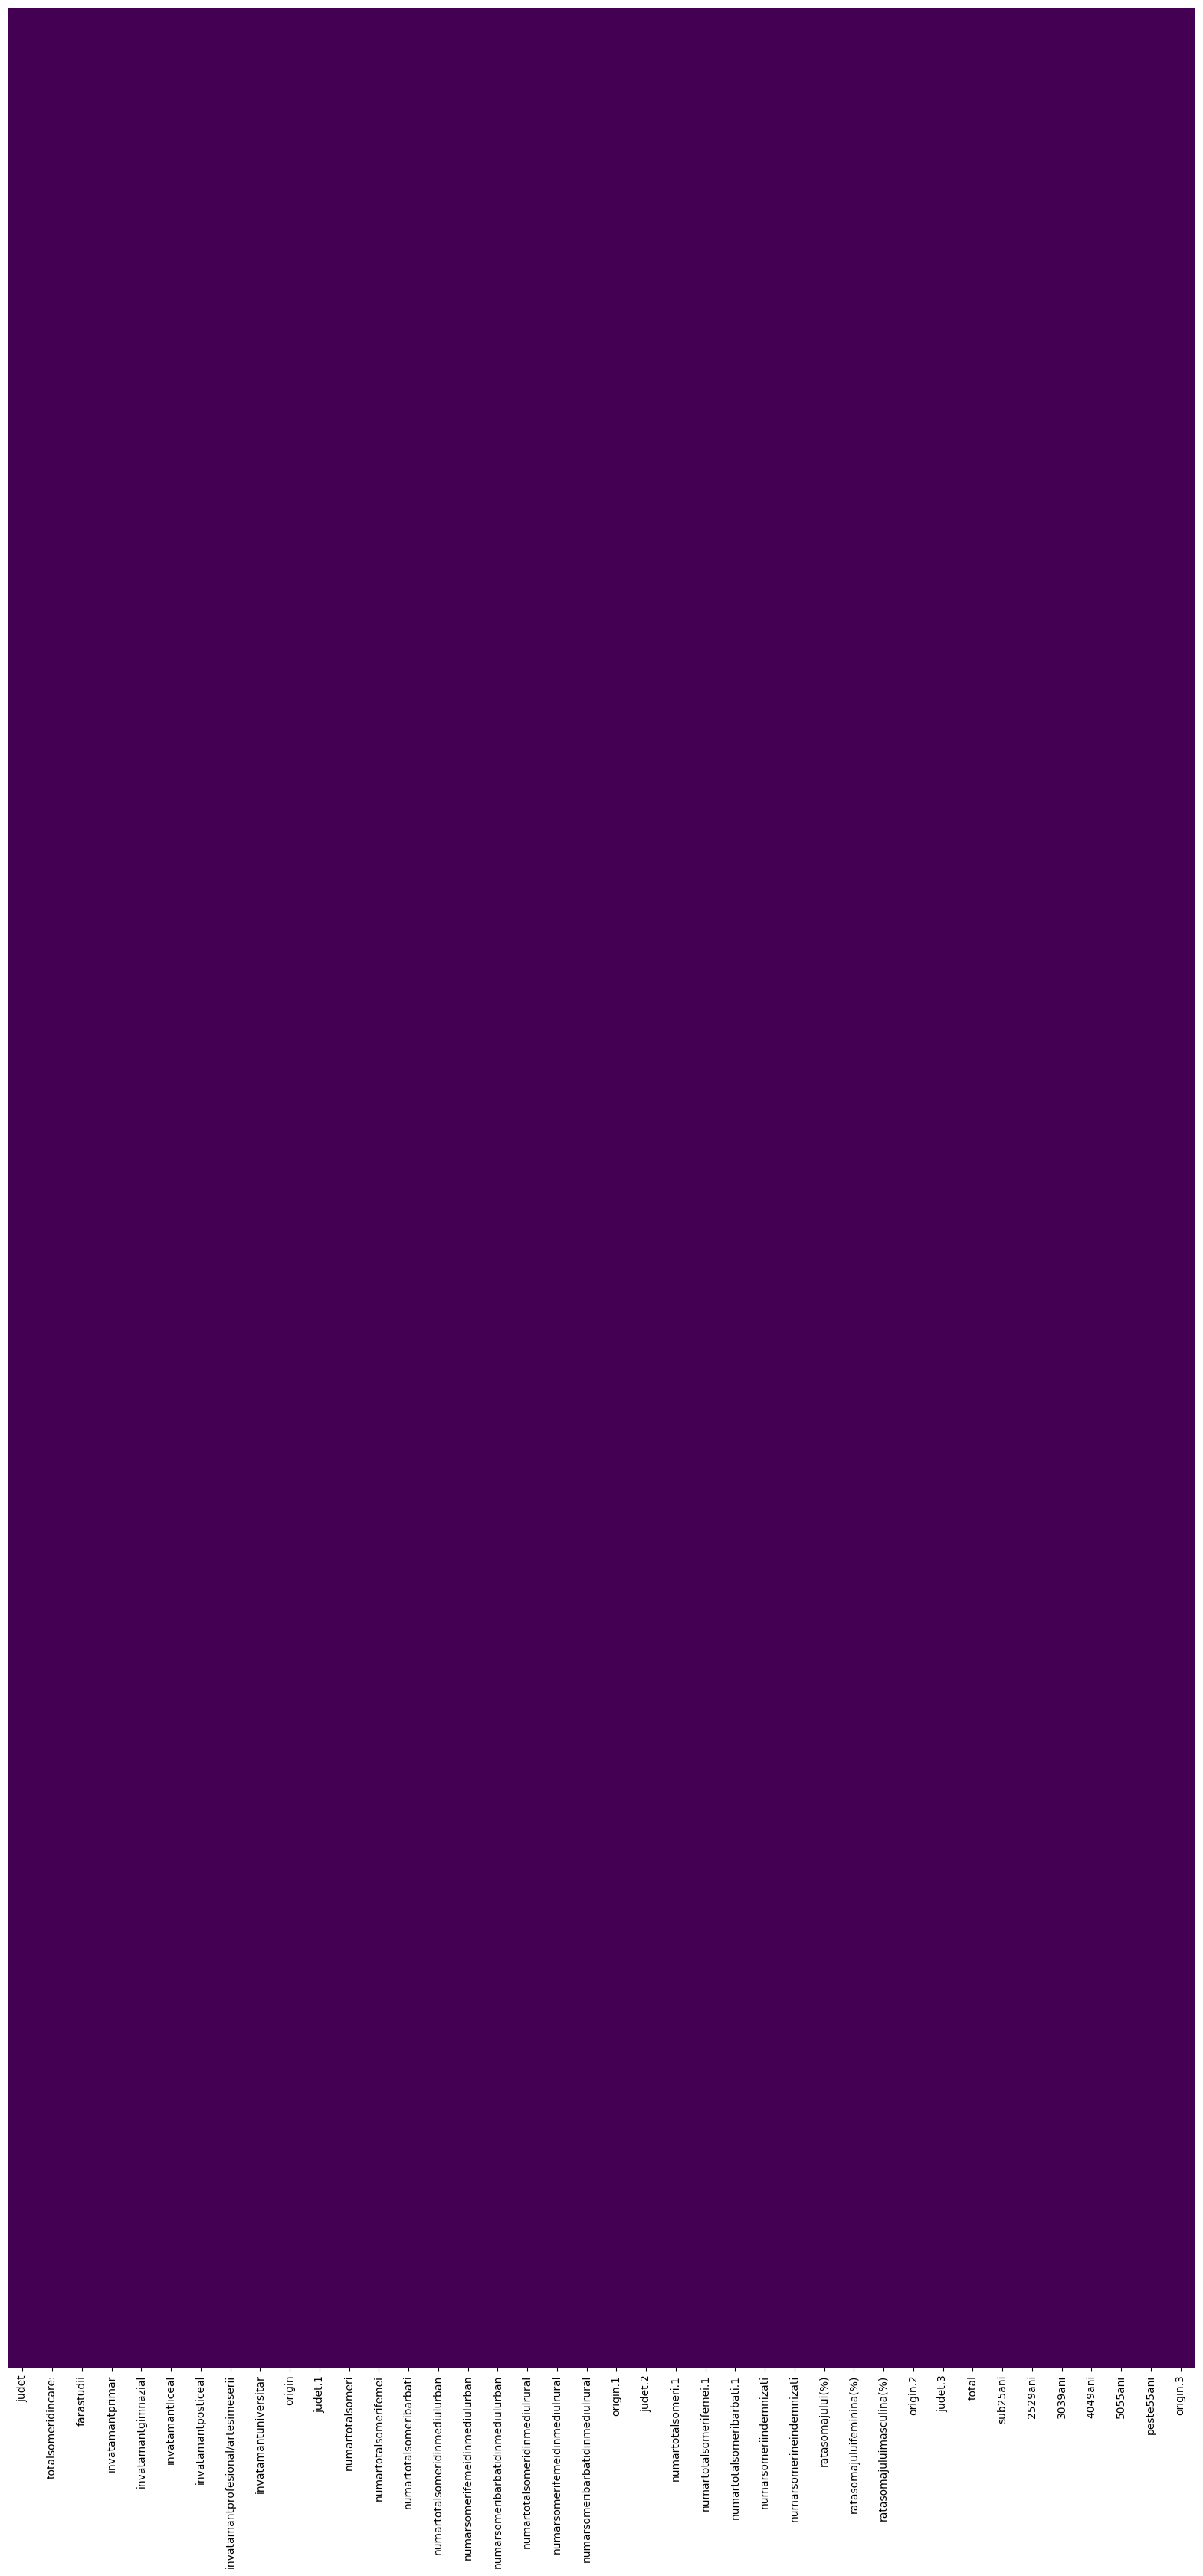

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,40))
sns.heatmap(base.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [62]:
base['invatamantposticeal'][0]

44

In [63]:
for index, row in base.iterrows():
    for column, value in row.items():
        if pd.isna(value):
            print(f"Row: {index}, Column: {column}, Value: {value}")

In [64]:
base['invatamantposticeal']=base['invatamantposticeal'].astype(str)
base['farastudii']=base['farastudii'].astype(str)
base['invatamantposticeal']=base['invatamantposticeal'].apply(lambda x : x.replace('-','0'))
base['farastudii']=base['farastudii'].apply(lambda x : x.replace('-','0'))

<Axes: >

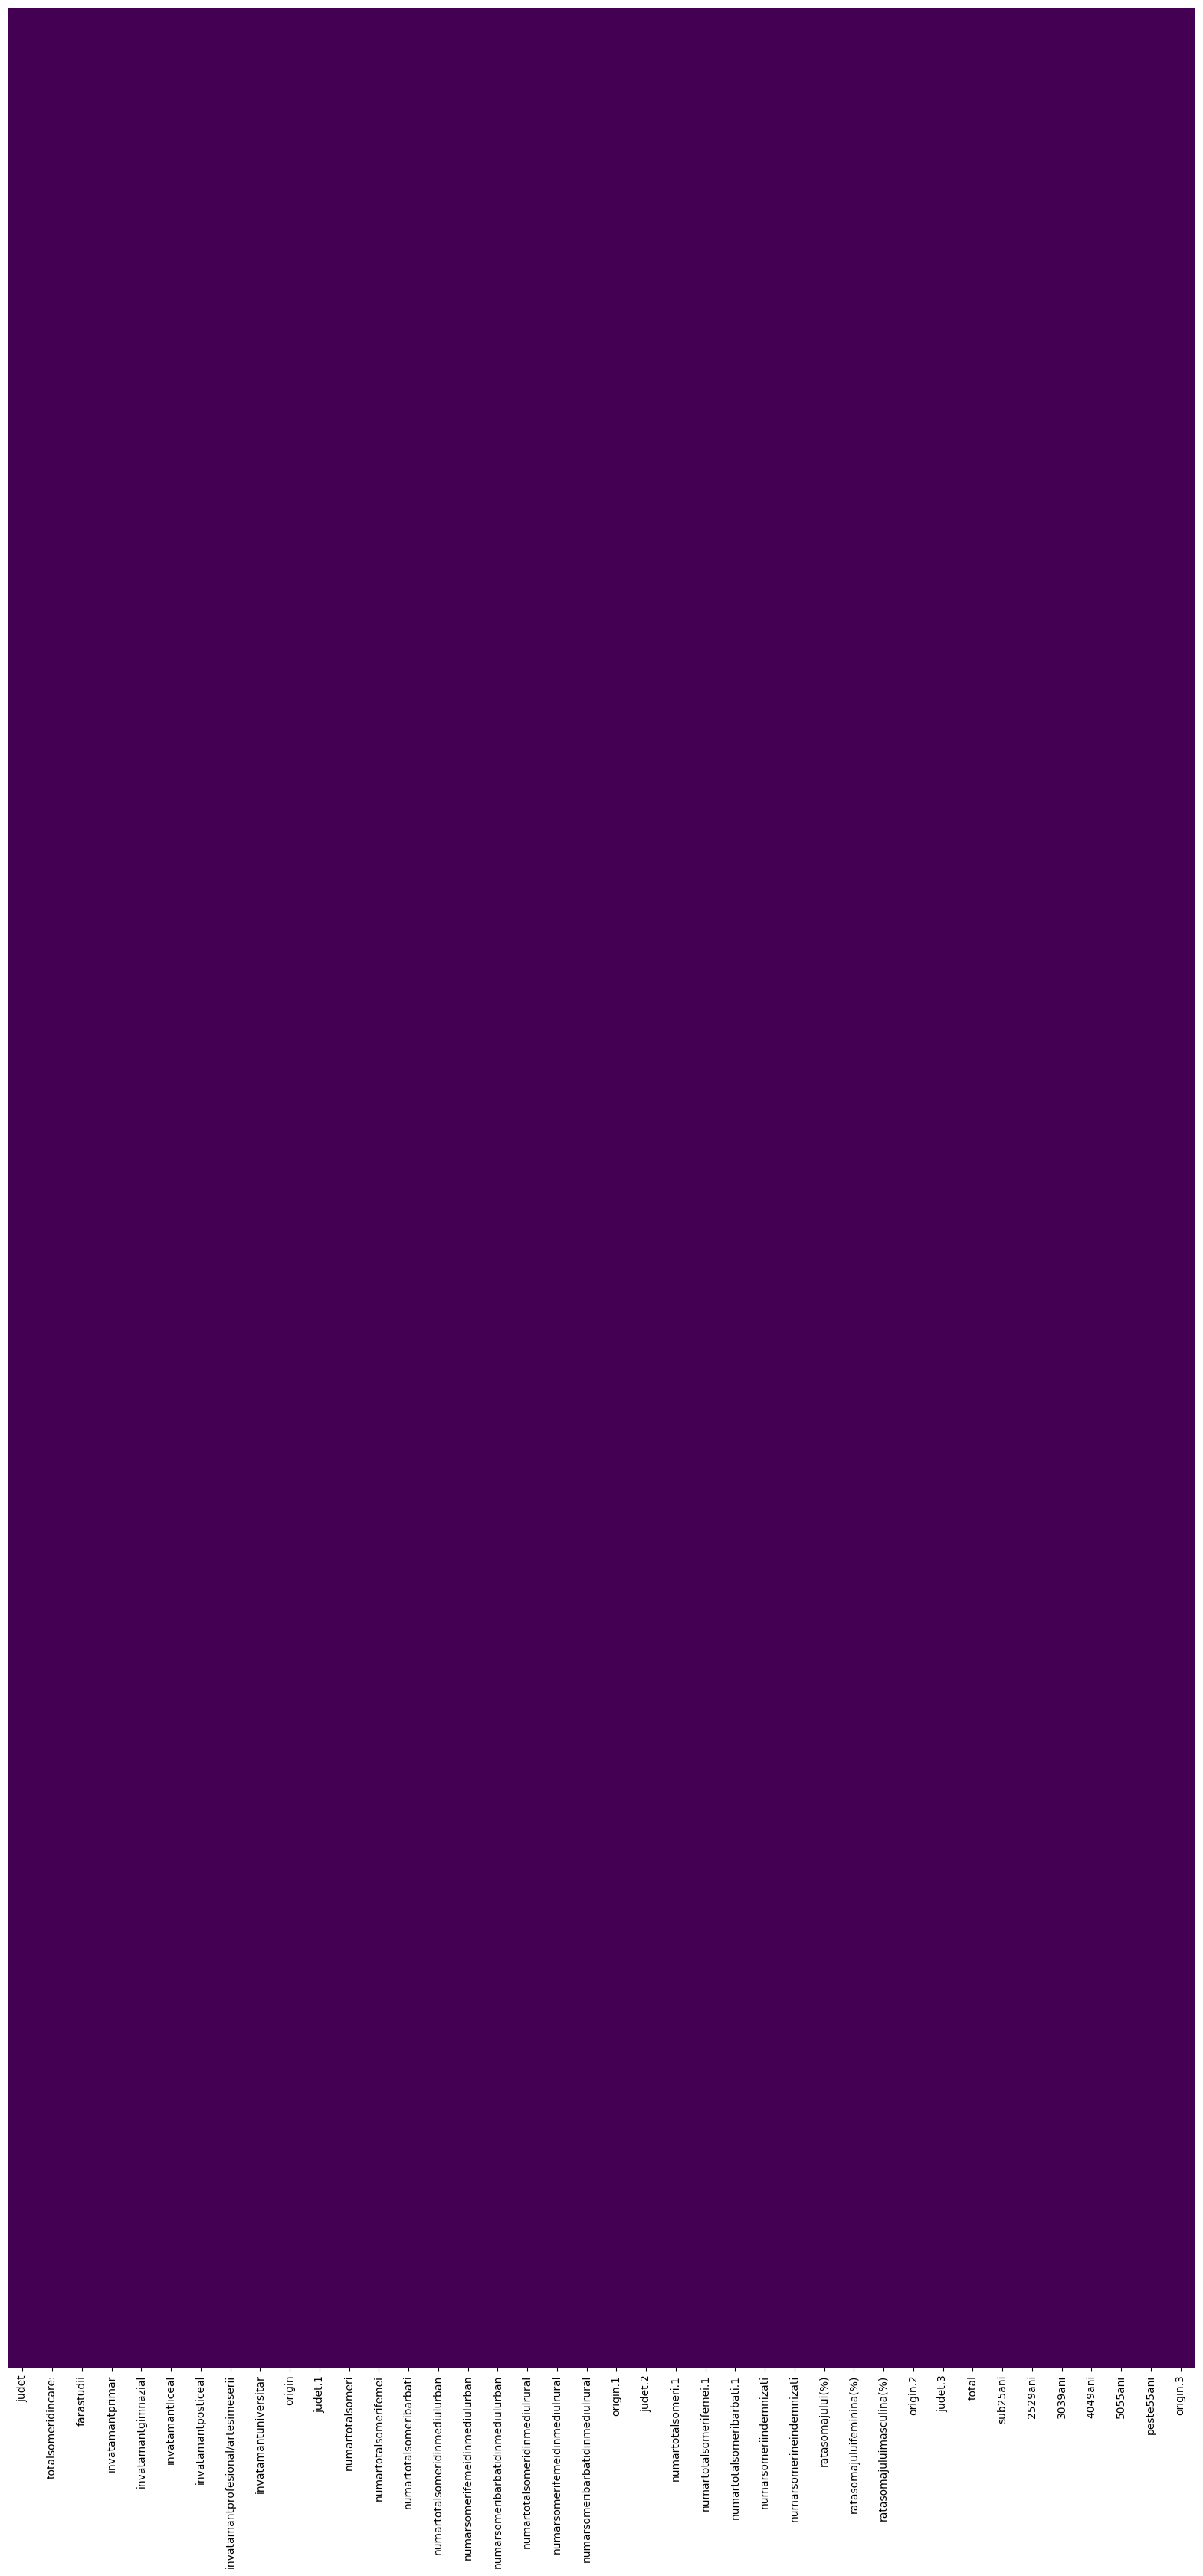

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,40))
sns.heatmap(base.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [66]:
# list_of_numbered_columns= ['farastudii','totalsomeridincare:', 'invatamantprimar',
#        'invatamantgimnazial', 'invatamantliceal', 'invatamantposticeal',
#        'invatamantprofesional/artesimeserii', 'invatamantuniversitar', 'numartotalsomeri', 'numartotalsomerifemei',
#        'numartotalsomeribarbati', 'numartotalsomeridinmediulurban',
#        'numarsomerifemeidinmediulurban', 'numarsomeribarbatidinmediulurban',
#        'numartotalsomeridinmediulrural', 'numarsomerifemeidinmediulrural',
#        'numarsomeribarbatidinmediulrural',
#        'numartotalsomeri.1', 'numartotalsomerifemei.1',
#        'numartotalsomeribarbati.1', 'numarsomeriindemnizati',
#        'numarsomerineindemnizati', 'total', 'sub25ani', '2529ani', '3039ani', '4049ani',
#        '5055ani', 'peste55ani']
# for item in list_of_numbered_columns:
#     switch=0
#     for i in range(0, len(base[item])):
#         current_type = type(base[item][i])
#         if np.issubdtype(current_type, np.float64) and switch==0:
#             base[item]=base[item].astype(int)
#             switch=1
#             current_type = type(base[item][i])
#         elif np.issubdtype(current_type, str) and switch==0:
#             base[item]=pd.to_numeric(base[item].str.replace(',', ''))
#             switch=1
#             current_type = type(base[item][i])
#         elif not (np.issubdtype(current_type, np.int32) or np.issubdtype(current_type, np.int64)):
#             print(f"Type in column '{item}' at index {i}: {current_type}")
            


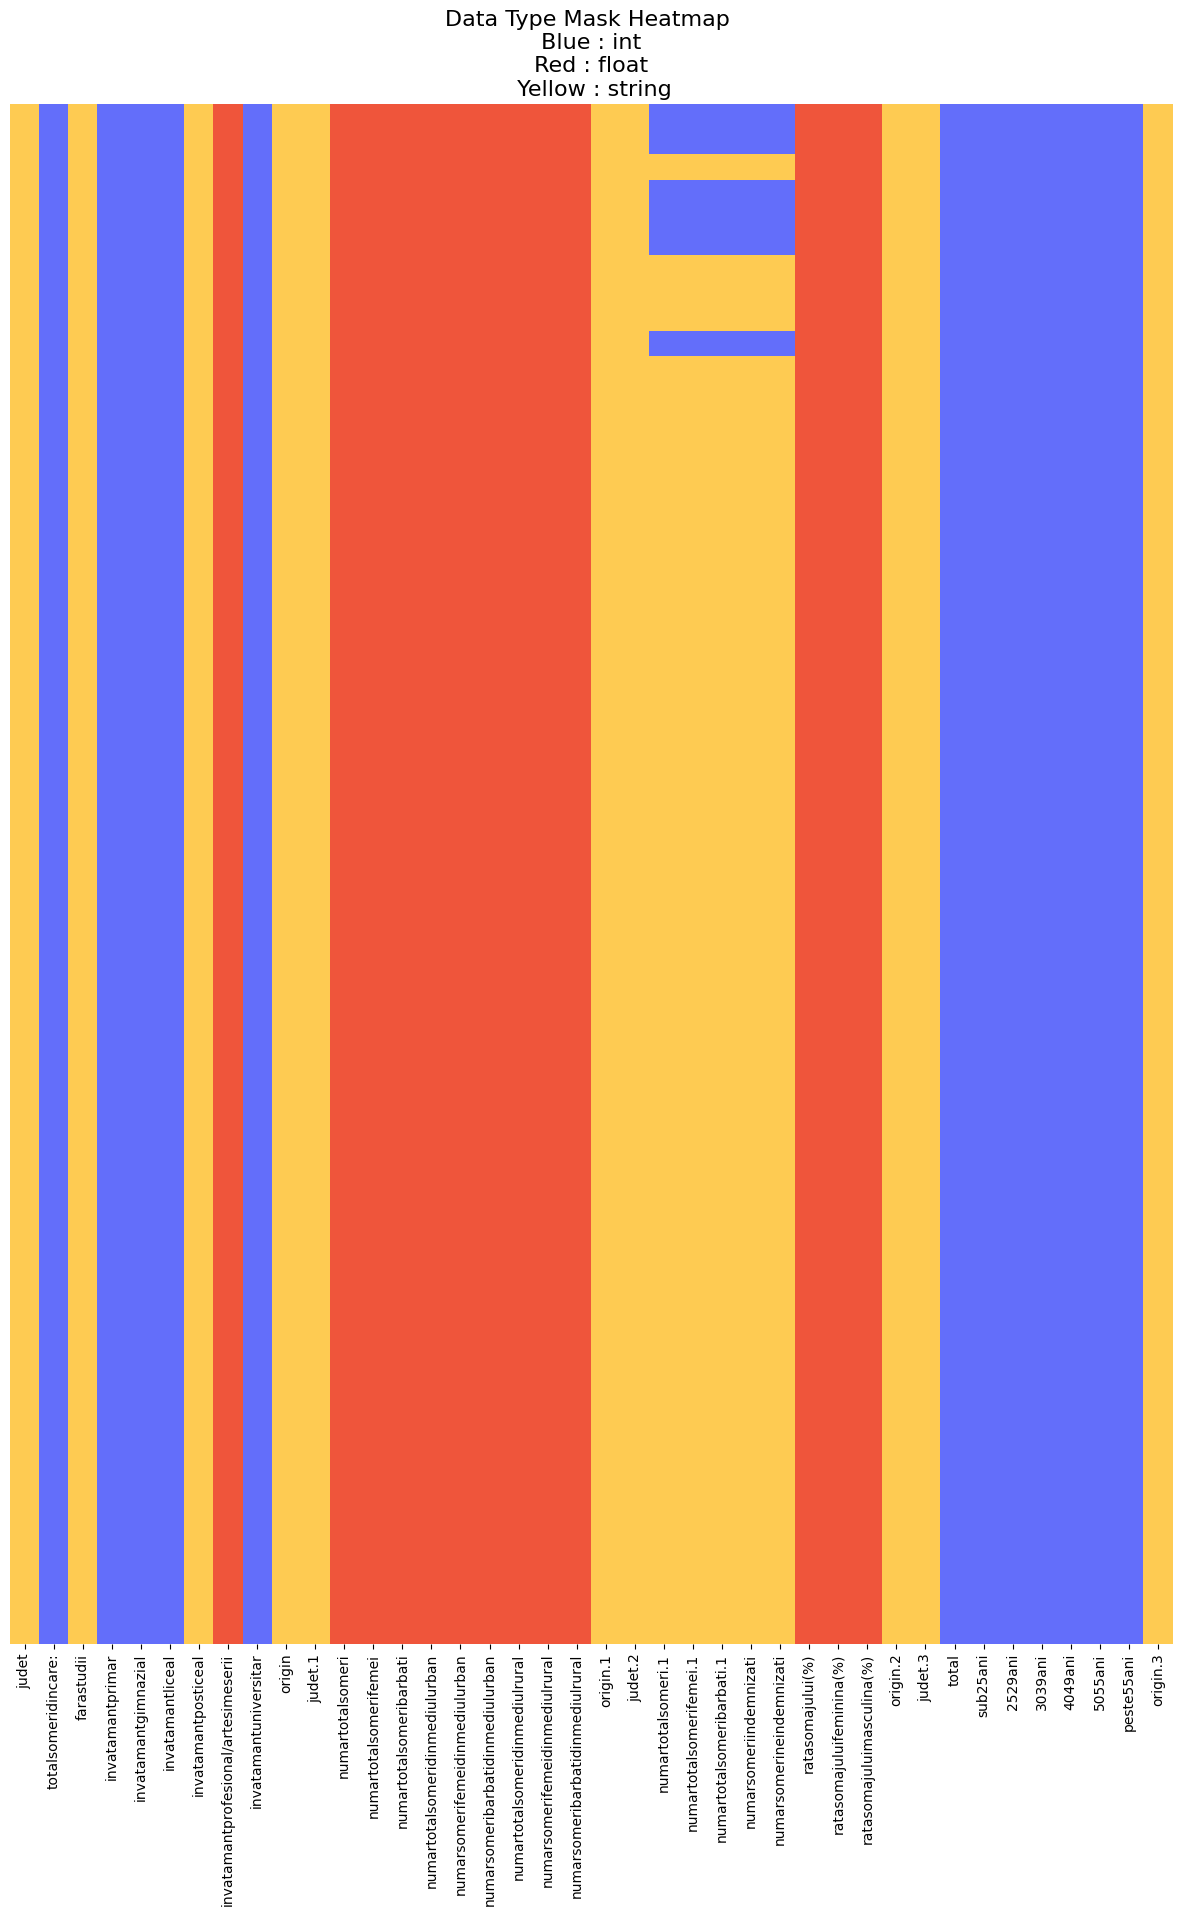

In [67]:
mask = base.applymap(lambda x: 2 if isinstance(x, (float, np.floating))
                  else 1 if isinstance(x, (int, np.integer))
                  else 3)
# 1 for in , 3 for object , 2 for floating

plt.figure(figsize = (15,20))
heatmap = sns.heatmap(mask, yticklabels=False, cbar=False, cmap=['#636EFA', '#EF553B', '#FECB52'])
heatmap.set_title("Data Type Mask Heatmap \n Blue : int \n Red : float \n Yellow : string", fontsize=16)
plt.show()

In [68]:
base['numarsomeriindemnizati'][30]

1059

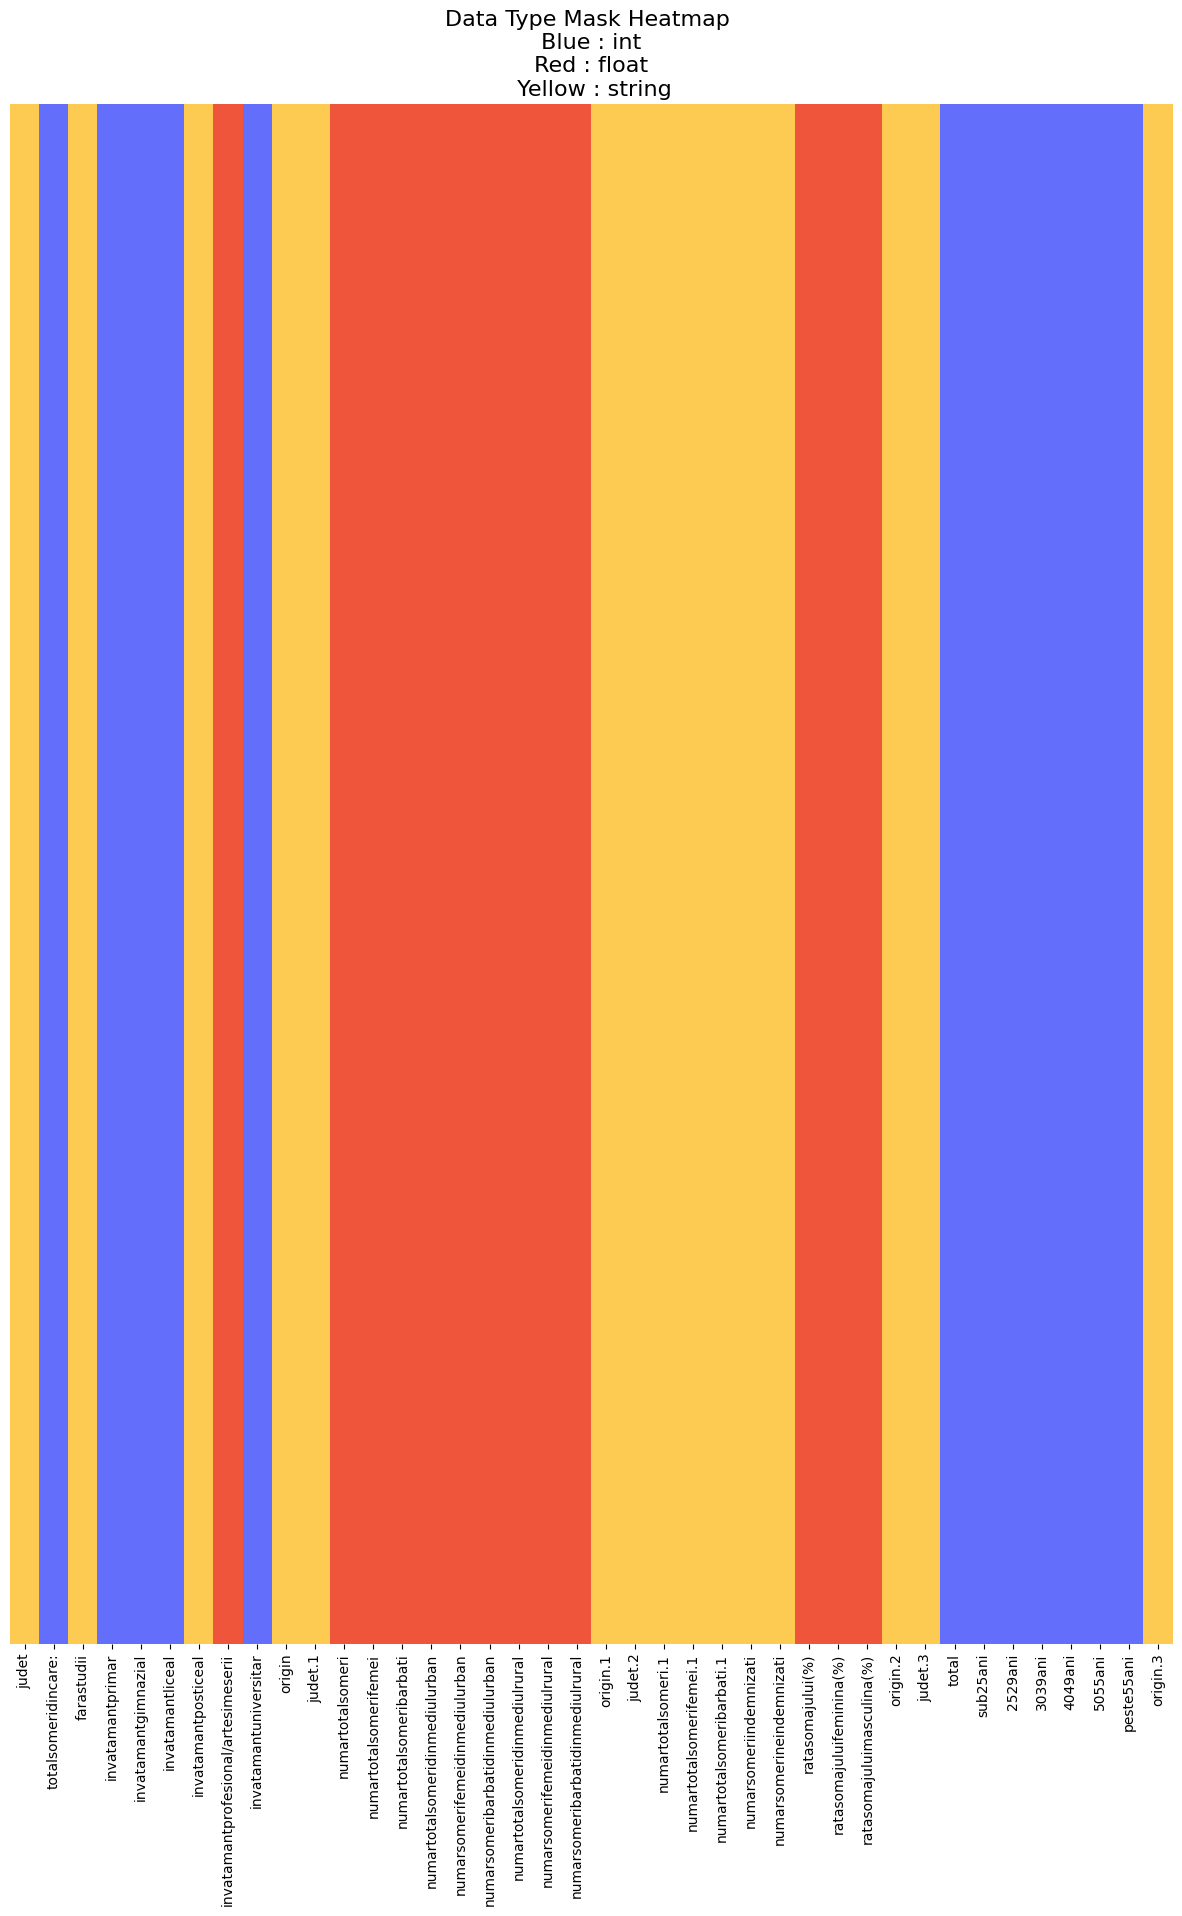

In [69]:
base2=pd.read_csv('base2.csv')
mask = base2.applymap(lambda x: 2 if isinstance(x, (float, np.floating))
                  else 1 if isinstance(x, (int, np.integer))
                  else 3)
# 1 for in , 3 for object , 2 for floating

plt.figure(figsize = (15,20))
heatmap = sns.heatmap(mask, yticklabels=False, cbar=False, cmap=['#636EFA', '#EF553B', '#FECB52'])
heatmap.set_title("Data Type Mask Heatmap \n Blue : int \n Red : float \n Yellow : string", fontsize=16)
plt.show()

In [70]:
for item in base.columns:
    if '.' in item:
        base.drop(item, inplace=True, axis=1)
base.drop('total', inplace=True, axis=1)
base.columns

Index(['judet', 'totalsomeridincare:', 'farastudii', 'invatamantprimar',
       'invatamantgimnazial', 'invatamantliceal', 'invatamantposticeal',
       'invatamantprofesional/artesimeserii', 'invatamantuniversitar',
       'origin', 'numartotalsomeri', 'numartotalsomerifemei',
       'numartotalsomeribarbati', 'numartotalsomeridinmediulurban',
       'numarsomerifemeidinmediulurban', 'numarsomeribarbatidinmediulurban',
       'numartotalsomeridinmediulrural', 'numarsomerifemeidinmediulrural',
       'numarsomeribarbatidinmediulrural', 'numarsomeriindemnizati',
       'numarsomerineindemnizati', 'ratasomajului(%)',
       'ratasomajuluifeminina(%)', 'ratasomajuluimasculina(%)', 'sub25ani',
       '2529ani', '3039ani', '4049ani', '5055ani', 'peste55ani'],
      dtype='object')

In [71]:
base['invatamantprofesional/artesimeserii']=base['invatamantprofesional/artesimeserii'].astype(int)
base['invatamantposticeal']=base['invatamantposticeal'].astype(str)
base['farastudii']=base['farastudii'].astype(str)
base['numarsomeriindemnizati']=base['numarsomeriindemnizati'].astype(str)
base['numarsomerineindemnizati']=base['numarsomerineindemnizati'].astype(str)
base['farastudii']=base['farastudii'].astype(str)
base['invatamantposticeal']=base['invatamantposticeal'].apply(lambda x : x.replace('-','0'))
base['farastudii']=base['farastudii'].apply(lambda x : x.replace('-','0'))

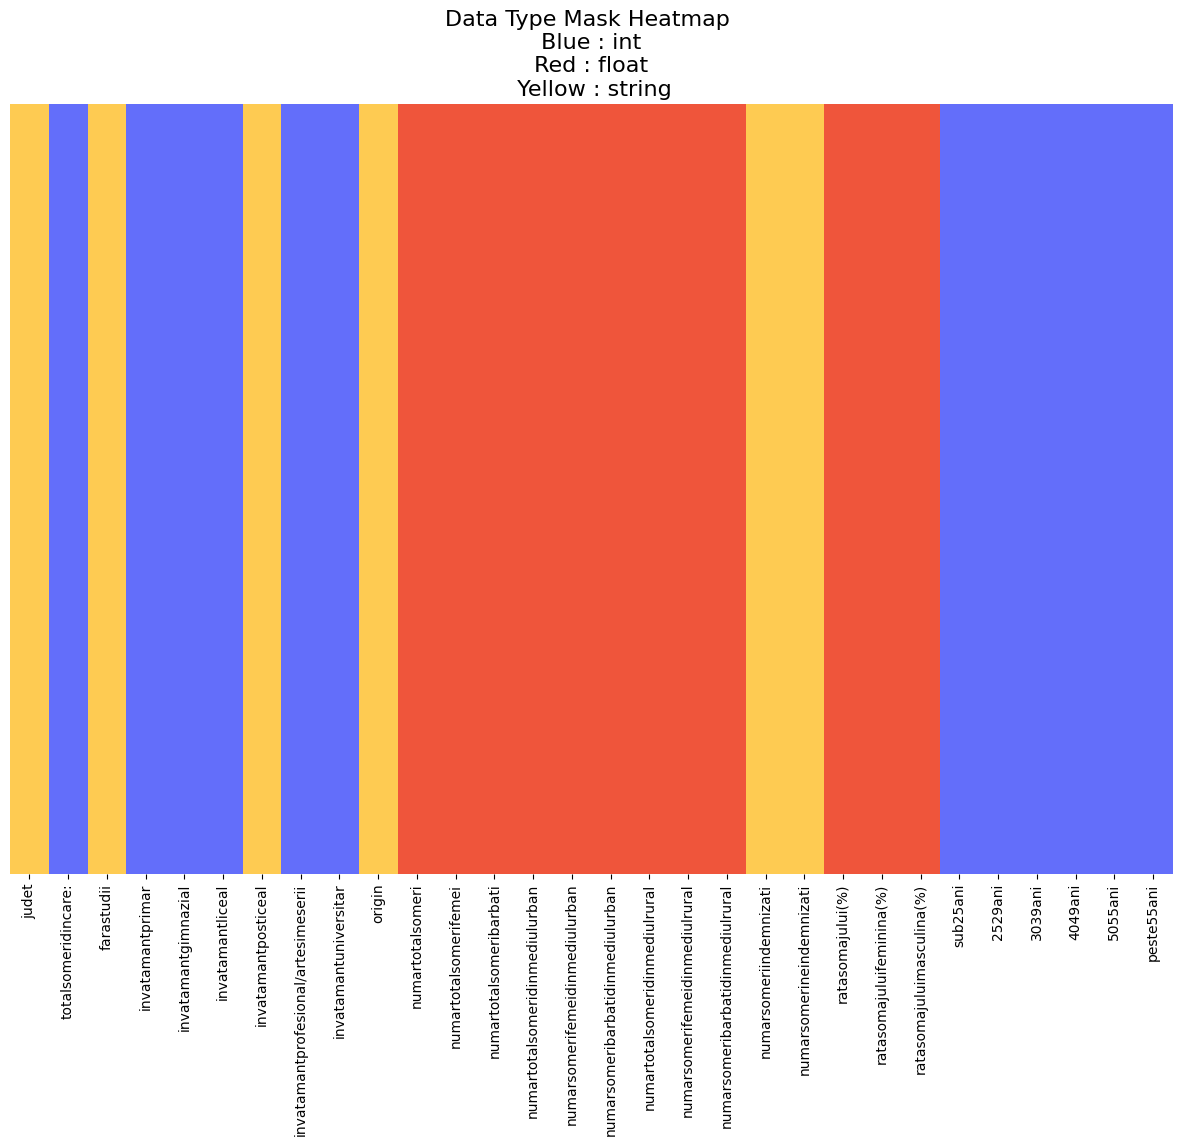

In [72]:
mask = base.applymap(lambda x: 2 if isinstance(x, (float, np.floating))
                  else 1 if isinstance(x, (int, np.integer))
                  else 3)
# 1 for in , 3 for object , 2 for floating

plt.figure(figsize = (15,10))
heatmap = sns.heatmap(mask, yticklabels=False, cbar=False, cmap=['#636EFA', '#EF553B', '#FECB52'])
heatmap.set_title("Data Type Mask Heatmap \n Blue : int \n Red : float \n Yellow : string", fontsize=16)
plt.show()

In [73]:
list_of_numbered_columns= ['farastudii','totalsomeridincare:', 'invatamantprimar',
       'invatamantgimnazial', 'invatamantliceal', 'invatamantposticeal',
       'invatamantprofesional/artesimeserii', 'invatamantuniversitar', 'numartotalsomeri', 'numartotalsomerifemei',
       'numartotalsomeribarbati', 'numartotalsomeridinmediulurban',
       'numarsomerifemeidinmediulurban', 'numarsomeribarbatidinmediulurban',
       'numartotalsomeridinmediulrural', 'numarsomerifemeidinmediulrural',
       'numarsomeribarbatidinmediulrural', 'numarsomeriindemnizati',
       'numarsomerineindemnizati', 'sub25ani', '2529ani', '3039ani', '4049ani',
       '5055ani', 'peste55ani']
for item in list_of_numbered_columns:
    switch=0
    for i in range(0, len(base[item])):
        current_type = type(base[item][i])
        if np.issubdtype(current_type, np.float64) and switch==0:
            base[item]=base[item].astype(int)
            switch=1
            current_type = type(base[item][i])
        elif np.issubdtype(current_type, str) and switch==0:
            base[item]=pd.to_numeric(base[item].str.replace(',', ''))
            switch=1
            current_type = type(base[item][i])
        elif not (np.issubdtype(current_type, np.int32) or np.issubdtype(current_type, np.int64)):
            print(f"Type in column '{item}' at index {i}: {current_type}")
            


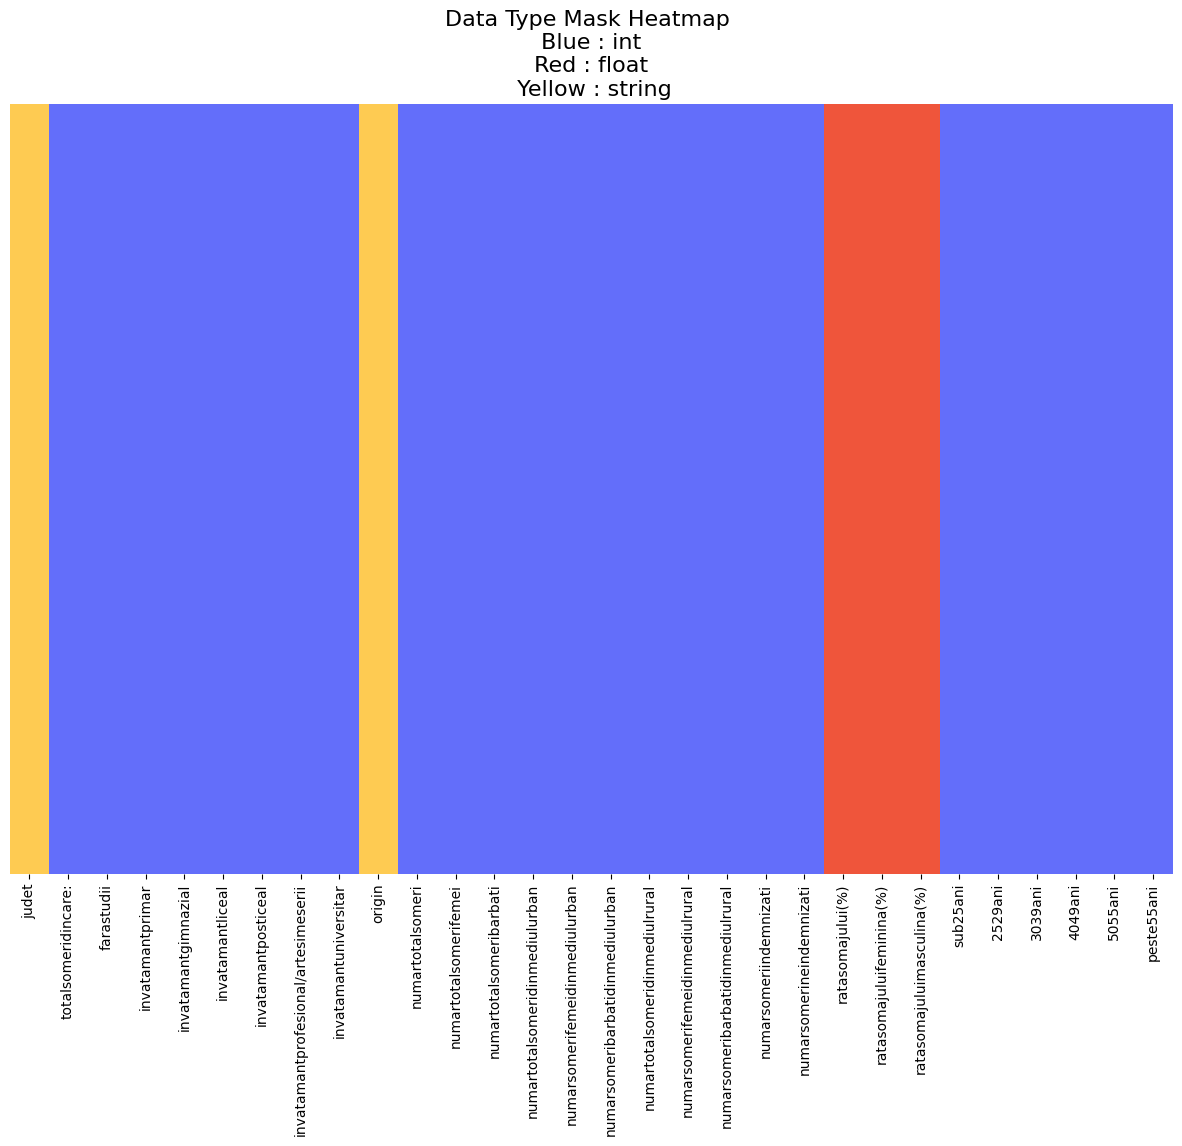

In [74]:
mask = base.applymap(lambda x: 2 if isinstance(x, (float, np.floating))
                  else 1 if isinstance(x, (int, np.integer))
                  else 3)
# 1 for in , 3 for object , 2 for floating

plt.figure(figsize = (15,10))
heatmap = sns.heatmap(mask, yticklabels=False, cbar=False, cmap=['#636EFA', '#EF553B', '#FECB52'])
heatmap.set_title("Data Type Mask Heatmap \n Blue : int \n Red : float \n Yellow : string", fontsize=16)
plt.show()